In [24]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [25]:
N=16384 # 1024*16 es decir 16l
fs=1e9 # 1GSs

t=np.linspace(0,N/fs,N,endpoint=False)
print("ts = {} s".format(t[1]))
print("fs = {} Hz".format(fs))

ts = 1e-09 s
fs = 1000000000.0 Hz


In [26]:
## Señal a analizar
f=100e6 # 1MHz
a=1 # 1V

To=N/fs
fo=1/To

In [27]:
xo_IQ=a*np.exp(2j*np.pi*fo*1*t)
x_IQ=a*np.exp(2j*np.pi*f*t)
bm=np.blackman(N)
u=np.ones(N)

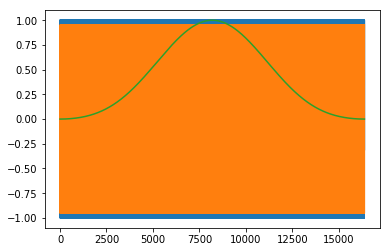

In [28]:
plt.plot(t*1e9,x_IQ.real,t*1e9,x_IQ.imag,t*1e9,bm)

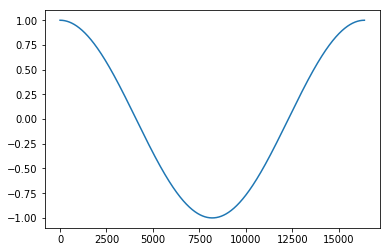

In [29]:
plt.plot(t*1e9,xo_IQ.real)

In [30]:
def mi_fft(muestas,win):
    c=len(win)/np.sum(win)
    return 10*np.log10(np.fft.fftshift(np.fft.fft(muestas*win*c))/len(muestas))

fcia=np.linspace(-fs/2,fs/2,len(x_IQ))/1e6


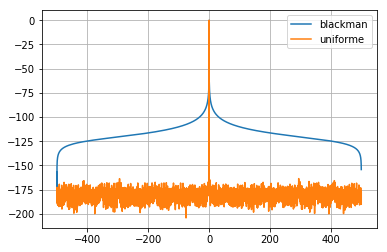

In [31]:
y=mi_fft(xo_IQ,bm)
y1=mi_fft(xo_IQ,u)
plt.plot(fcia,np.real(y),label="blackman")
plt.plot(fcia,np.real(y1),label="uniforme")
plt.legend(fontsize=10)
plt.grid(True)

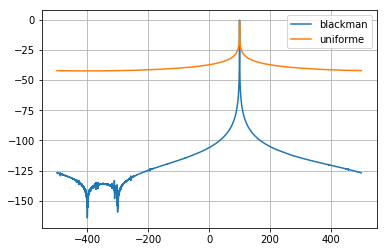

In [32]:
y=mi_fft(x_IQ,bm)
y1=mi_fft(x_IQ,u)
plt.plot(fcia,np.real(y),label="blackman")
plt.plot(fcia,np.real(y1),label="uniforme")
plt.legend(fontsize=10)
plt.grid(True)